In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import api_key

from census import Census
from us import states

In [ ]:
#TK Code

In [ ]:
print ("I made changes to the file")
print("Added new print stmt")
print("last stmt")

In [ ]:
#TK code ends

In [ ]:
#Adam code

In [16]:
c = Census(api_key, year=2016)
raw_data = c.acs5.get(('NAME', 'B19013_001E', 'B19301_001E', 'B23025_003E',
                       'B23025_004E', 'B23025_005E', 'B01003_001E', "B01002_001E"), {'for':'state:*'})
census_df = pd.DataFrame(raw_data)
census_df = census_df.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
                          'B01003_001E':'Total_population',
                          'B23025_003E':'Employable_civilians',
                          'B23025_004E':'Employed_civilians', 
                          'B23025_005E':'Unemployed_civilians', 
                          'B19013_001E':'Income',
                          'B19301_001E':'Income_per_capita',
                          "B01002_001E":'median age'
                          
    
})
census_df_raw = census_df_raw.sort_values('State#').reset_index(drop=True)
census_df_raw.head()

ConnectionError: HTTPSConnectionPool(host='api.census.gov', port=443): Max retries exceeded with url: /data/2016/acs/acs5?get=NAME%2CB19013_001E%2CB19301_001E%2CB23025_003E%2CB23025_004E%2CB23025_005E%2CB01003_001E%2CB01002_001E&for=state%3A%2A&key=e1497a8d345d673c85e76c19276065ca0a0e141f (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11f74b050>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [2]:
#Presidential file to dataframe called df
file = "Resources/1976-2016-president.tab"
df = pd.read_csv(file,sep='\t',header=(0))
df.tail(40)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
3700,2016,Vermont,VT,50,13,6,US President,Blank Vote,NaN,False,4574,320467,20171015,NaN
3701,2016,Vermont,VT,50,13,6,US President,"De La Fuente, Roque \\""Rocky\""\""""",independent,False,1063,320467,20171015,NaN
3702,2016,Vermont,VT,50,13,6,US President,Void Vote,NaN,False,826,320467,20171015,NaN
3703,2016,Vermont,VT,50,13,6,US President,"La Riva, Gloria Estella",liberty union party,False,327,320467,20171015,NaN
3704,2016,Virginia,VA,51,54,40,US President,"Clinton, Hillary",democrat,False,1981473,3982752,20171015,NaN
3705,2016,Virginia,VA,51,54,40,US President,"Trump, Donald J.",republican,False,1769443,3982752,20171015,NaN
3706,2016,Virginia,VA,51,54,40,US President,"Johnson, Gary",libertarian,False,118274,3982752,20171015,NaN
3707,2016,Virginia,VA,51,54,40,US President,"McMullin, Evan",independent,False,54054,3982752,20171015,NaN
3708,2016,Virginia,VA,51,54,40,US President,NaN,NaN,True,31870,3982752,20171015,NaN
3709,2016,Virginia,VA,51,54,40,US President,"Stein, Jill",green,False,27638,3982752,20171015,NaN


In [3]:
party = df.groupby("party")
party = party["candidatevotes"].sum()
party = pd.DataFrame(party.sort_values(ascending=False))
party.head(10)

,candidatevotes
party,
republican,558286316
democrat,553813829
independent,28193567
libertarian,8947877
reform party,6915968
green,5046219
democratic-farmer-labor,4159447
conservative,2467312
liberal party,1107541


In [4]:
party_state = df.groupby(["party", "state"])
party_state.sum()

year  state_fips  state_cen  state_ic  \
party                      state                                                
6 million jobs             New Jersey   1992          34         22        12   
alaskan independence party Alaska       4012           4        188       162   
alliance                   Alabama      1984           1         63        41   
                           Arkansas     1984           5         71        42   
                           Colorado     1984           8         84        62   
...                                      ...         ...        ...       ...   
workers world              Wisconsin    3964         110         70        50   
workers world party        New Jersey   2016          34         22        12   
                           Wisconsin    2016          55         35        25   
working families           New York    10040         180        105        65   
write-in                   New Mexico   1988          35         85        66   

                                       writein  candidatevotes  totalvotes  \
party                      state                                             
6 million jobs             New Jersey      0.0            2095     3343594   
alaskan independence party Alaska          0.0            3752      638795   
alliance                   Alabama         0.0             659     1441713   
                           Arkansas        0.0            1291      884406   
                           Colorado        0.0             978     1295380   
...                                        ...             ...         ...   
workers world              Wisconsin       0.0            1033     4484910   
workers world party        New Jersey      0.0            1749     3874046   
                           Wisconsin       0.0            1770     2976150   
working families           New York        0.0          669217    37049368   
write-in                   New Mexico      1.0              93      521387   

                                         version  notes  
party                      state                         
6 million jobs             New Jersey   20171015    0.0  
alaskan independence party Alaska       40342030    0.0  
alliance                   Alabama      20171015    0.0  
                           Arkansas     20171015    0.0  
                           Colorado     20171015    0.0  
...                                          ...    ...  
workers world              Wisconsin    40342030    0.0  
workers world party        New Jersey   20171015    0.0  
                           Wisconsin    20171015    0.0  
working families           New York    100855075    0.0  
write-in                   New Mexico   20171015    0.0  

[992 rows x 9 columns]

In [10]:
#list just republican/democrat
parties = list(df["party"].unique())
parties
#would consider conservative, republican, and liberal party democrat. need to combine. 
combined_dem_rep = df.replace("conservative","republican")
combined_dem_rep = combined_dem_rep.replace("liberal party", "democrat")
combined_dem_rep = combined_dem_rep.replace("democratic-farmer-labor","democrat")
dems = combined_dem_rep.loc[combined_dem_rep["party"] == "democrat"]
repubs = combined_dem_rep.loc[combined_dem_rep["party"] == "republican"]
dems_repubs = dems.append(repubs)
state_count = dems_repubs.groupby(["party", "state"])
state_count = pd.DataFrame(state_count[["candidatevotes", "totalvotes"]].sum())
state_count

candidatevotes  totalvotes
party      state                                    
democrat   Alabama               7474816    18414593
           Alaska                 931882     2733324
           Arizona               7326679    19989474
           Arkansas              4655456    10415622
           California           63180373   121099221
...                                  ...         ...
republican Virginia             15234498    33111951
           Washington           11325818    26405423
           West Virginia         3905145     7698350
           Wisconsin            12909841    28131702
           Wyoming               1454175     2332010

[102 rows x 2 columns]

In [6]:
dem_votes_by_state = dems[["state","candidatevotes","totalvotes"]]
dem_votes_by_state = dem_votes_by_state.groupby("state")
dem_votes_by_state = dem_votes_by_state.sum()
len(dem_votes_by_state)

repubs_votes_by_state = repubs[["state","candidatevotes","totalvotes"]]
repubs_votes_by_state = repubs_votes_by_state.groupby("state")
repubs_votes_by_state = repubs_votes_by_state.sum()
repubs_votes_by_state

dems_merged_repubs = pd.merge(dem_votes_by_state, repubs_votes_by_state, on="state", how="outer")
dems_merged_repubs = dems_merged_repubs.rename(columns = {"candidatevotes_x":"democrat votes",
                                                         "candidatevotes_y": "republican votes"})
dems_merged_repubs = dems_merged_repubs[['democrat votes', 'republican votes']]
dems_merged_repubs["Difference%ofTotal"] = (dems_merged_repubs["democrat votes"] - dems_merged_repubs["republican votes"])/(dems_merged_repubs["democrat votes"]+dems_merged_repubs["republican votes"])
dems_merged_repubs = dems_merged_repubs.sort_values("Difference%ofTotal", ascending=False)
dems_merged_repubs



,democrat votes,republican votes,Difference%ofTotal
state,,,
District of Columbia,2129296,236622,0.799974
Massachusetts,17255316,11454247,0.202061
Hawaii,2343508,1567019,0.198564
Rhode Island,2632597,1764906,0.197314
New York,41803255,30141750,0.162089
Vermont,1572904,1151681,0.154601
Maryland,12518615,9211665,0.152182
California,63180373,50798923,0.108629
Illinois,28360406,23739254,0.088698


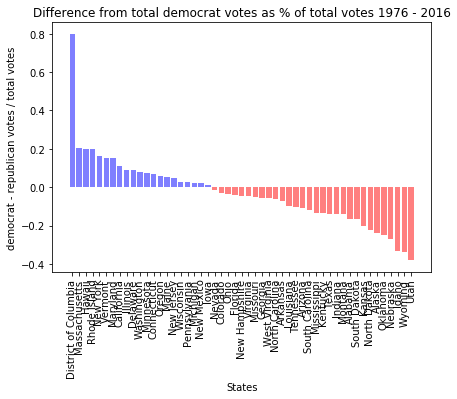

In [7]:
plots = list(dems_merged_repubs["Difference%ofTotal"])
x_axis = list(dems_merged_repubs.index)
colors = ["blue",
          "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",]
plt.bar(x_axis, plots, color=colors, alpha=0.5, align="center")
plt.tight_layout()
plt.xlabel("States")
plt.ylabel("democrat - republican votes / total votes")
plt.title("Difference from total democrat votes as % of total votes 1976 - 2016")
plt.xticks(rotation=90)
plt.show()


In [8]:
dems_repubs_minnesota = dems_repubs.loc[dems_repubs["state"] == "Minnesota"]
dems_repubs_minnesota = dems_repubs_minnesota.groupby("party").sum()
dems_repubs_minnesota = dems_repubs_minnesota[["candidatevotes","totalvotes"]]
dems_repubs_minnesota

,candidatevotes,totalvotes
party,,
democrat,13412331,26782310
republican,11576776,26782310


In [ ]:
#just curious about write in candidates
just_write_in = df.loc[df["writein"] == True]
just_write_in

In [ ]:
write_in_by_state = just_write_in.groupby("state")
write_in_by_state = pd.DataFrame(write_in_by_state["candidatevotes"].sum())
sorted_write_in_by_state = write_in_by_state["candidatevotes"].sort_values(ascending=False)
sorted_write_in_by_state

In [ ]:
candidate = df.groupby("candidate")
temp = candidate.sum()
temp["% of totalvotes"] = temp["candidatevotes"]/temp["totalvotes"]
temp = pd.DataFrame(temp["% of totalvotes"].sort_values(ascending=False))
temp.head(25)

In [9]:
year_2016 = df.loc[df["year"]==2016]

by_candidate_2016 = year_2016.groupby("candidate")
total_votes = by_candidate_2016["candidatevotes"].sum().sort_values(ascending=False)
total_votes

candidate
Clinton, Hillary                     65853581
Trump, Donald J.                     62985062
Johnson, Gary                         4244326
Stein, Jill                           1393155
McMullin, Evan                         498179
Castle, Darrell L.                     179096
Blank Vote                             171507
Scattering                             152493
Other                                  152234
La Riva, Gloria Estella                 73671
None Of The Above                       28863
De La Fuente, Roque \\"Rocky\"\""       25547
Vacek, Dan                              13537
Kopitke, Kyle Kenley                     9096
Kennedy, Alyson                          8586
Kahn, Lynn S.                            5637
Keniston, Chris                          5028
Hedges, Jim                              4709
Void Vote                                4278
Moorehead, Monica                        3519
Skewes, Peter                            3246
Emidio \\"Mimi\"\", Solt

In [ ]:
year_2012 = df.loc[df["year"]==2012]

by_candidate_2012 = year_2012.groupby("candidate")
total_votes_2012 = by_candidate_2012["candidatevotes"].sum().sort_values(ascending=False)
total_votes_2012

In [ ]:
#Adam code ends

In [ ]:
#Ryan code

In [ ]:
from census import Census
from us import states

c = Census(api_key, year=2018)

In [ ]:
* As only civilians are legel to vote, it would make sense to only pull the civilian employment data.
* The labor force is the sum of employed and unemployed persons
* Columns data to pull: 
* Income variables: 
    "income": B19013_001E, "income_per_capita": B19301_001E
* Employment variables:
    "employable civilians": B23025_003E, "employed civilians": B23025_004E, "unemployed civilians": B23025_005E
* Population variables: 
    "Total population": B01003_001E
* Poverty variables:
    "poverty people": "B17001_002E"
* Age variables:
    "median age": "B01002_001E" 

In [ ]:
raw_data = c.acs5.get(('NAME', 'B19013_001E', 'B19301_001E', 'B23025_003E',
                       'B23025_004E', 'B23025_005E', 'B01003_001E', "B01002_001E"), {'for':'state:*'})
df = pd.DataFrame(raw_data)
df = df.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
                          'B01003_001E':'Total_population',
                          'B23025_003E':'Employable_civilians',
                          'B23025_004E':'Employed_civilians', 
                          'B23025_005E':'Unemployed_civilians', 
                          'B19013_001E':'Income',
                          'B19301_001E':'Income_per_capita',
                          "B01002_001E":'median age'
                          
    
})
df = df.sort_values('State#').reset_index(drop=True)
df

In [ ]:
#Ryan code ends

In [ ]:
#Connor code

In [ ]:
print("I made a change too!")

In [ ]:
#Connor code ends